In [8]:
import os
import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


data_path =  os.getenv('HOME')+"/aiffel/prj/train_bert.csv"
df = pd.read_csv(data_path)

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)

print("슝=3")

슝=3


In [10]:
df.head()

df['conversation'][6]
df['text'][6]

'35번 손님 아이스커피 두잔나왔습니다 아이스커피  네 맛있게드세요 저기요 아가씨 나는 아아스 시킨적이 없는데 아 분명 오늘 날이 더우시다고 아이스로 시키셨는데요 내가 그랫어  네분명히 아그런 기억이 없는데 아가씨가잘못안거 아니야 아니요 오늘 손님이 첫 주문이라 확실히 기억하고 있습니다 아가씨 왜이렇게 유도리가 없이 굴어 그냥 아 제가 잘못 주문 받았습니다 하면 되지  네  어휴 유도리 없어 그냥 마실게'

담화의 최대 길이 :842
담화의 평균 길이 :215.85037974683544


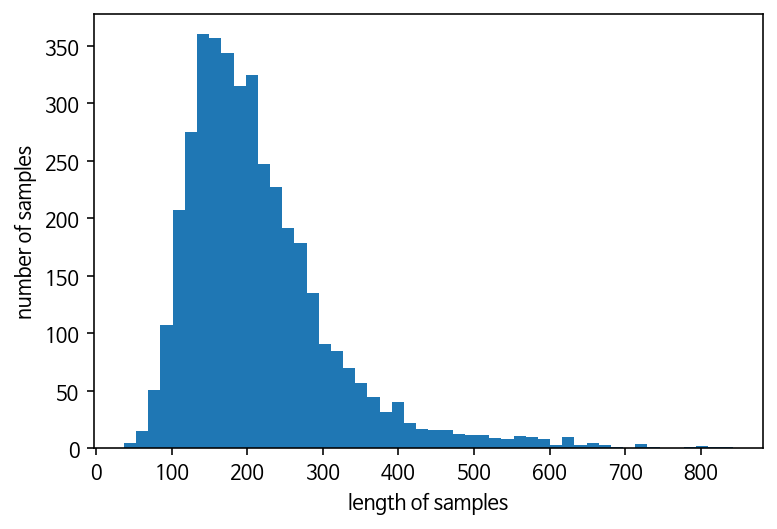

In [11]:
print('담화의 최대 길이 :{}'.format(max(len(sample) for sample in df['text'])))
print('담화의 평균 길이 :{}'.format(sum(map(len, df['text']))/len(df['text'])))

plt.hist([len(sample) for sample in df['text']], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [12]:
print(df['class'].unique())

['협박 대화' '기타 괴롭힘 대화' '갈취 대화' '직장 내 괴롭힘 대화']


협박 대화 의 최대 길이 :807
협박 대화 의 평균 길이 :234.85714285714286


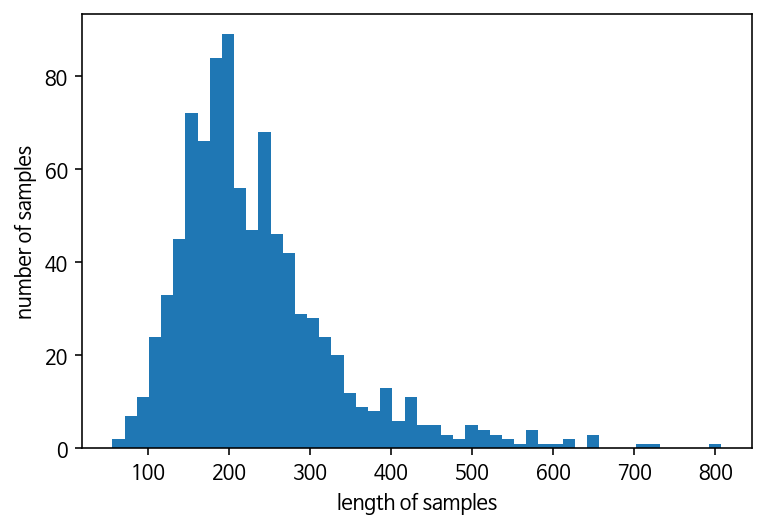

기타 괴롭힘 대화 의 최대 길이 :842
기타 괴롭힘 대화 의 평균 길이 :199.94149908592323


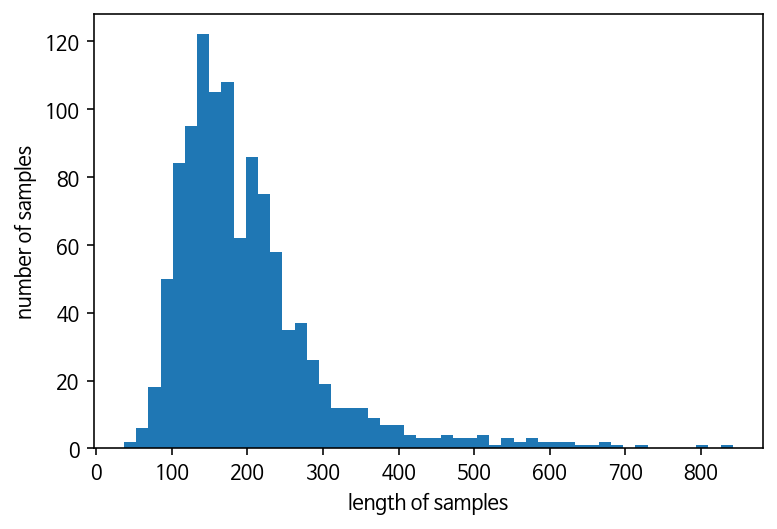

갈취 대화 의 최대 길이 :658
갈취 대화 의 평균 길이 :205.47604485219165


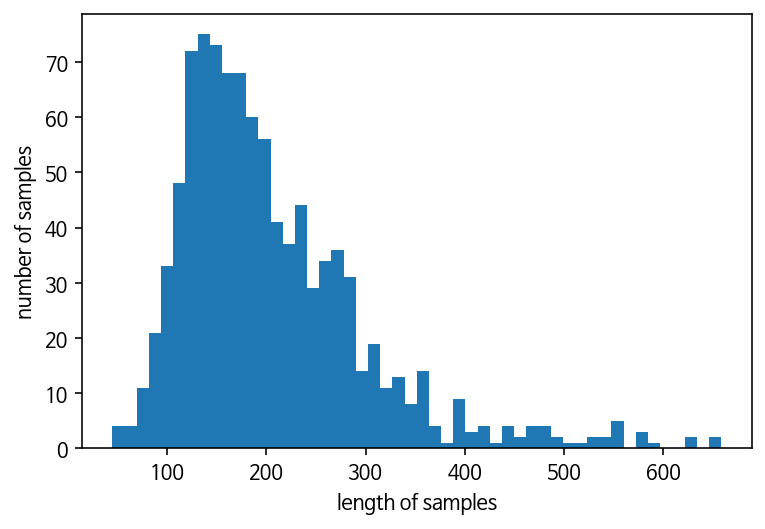

직장 내 괴롭힘 대화 의 최대 길이 :810
직장 내 괴롭힘 대화 의 평균 길이 :226.62819203268643


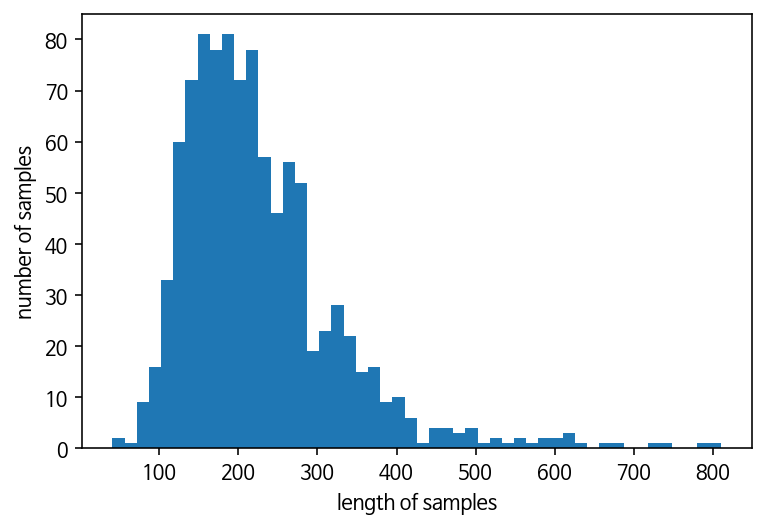

In [13]:
class_lst = ['협박 대화', '기타 괴롭힘 대화', '갈취 대화', '직장 내 괴롭힘 대화']

for i in class_lst:
    print('{}의 최대 길이 :{}'.format(i+' ',max(len(sample) for sample in df[df['class']==i]['text'])))
    print('{}의 평균 길이 :{}'.format(i+' ',sum(map(len, df[df['class']==i]['text']))/len(df[df['class']==i]['text'])))
    plt.hist([len(sample) for sample in df[df['class']==i]['text']], bins=50)
    plt.xlabel('length of samples')
    plt.ylabel('number of samples')
    plt.show()


- 분포 자체는 크게 차이가 안나는 것 같음..?


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

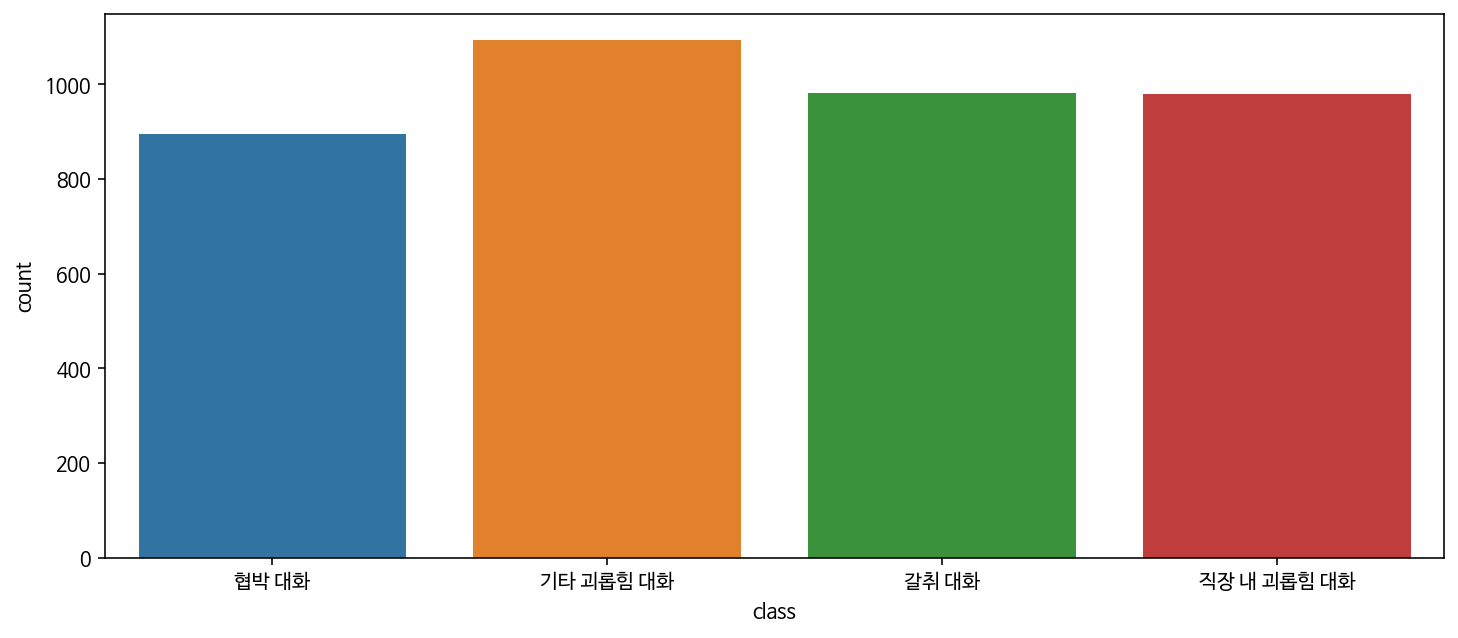

In [14]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(df['class'])

In [15]:
df[df['class']==class_lst[0]]['class'] = 0 #협박 대화는 0으로 변경

/tmp/ipykernel_31/3360627733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['class']==class_lst[0]]['class'] = 0 #협박 대화는 0으로 변경


In [16]:
class_lst = ['협박 대화', '갈취 대화', '직장 내 괴롭힘 대화', '기타 괴롭힘 대화']


for i in range(len(df)):
    if df['class'][i] == class_lst[0]: #협박 대화
        df['class'][i] = 0
    elif df['class'][i] == class_lst[1]: #갈취 대화
        df['class'][i] = 1
    elif df['class'][i] == class_lst[2]: #직장 내 괴롭힘 대화
        df['class'][i] = 2
    elif df['class'][i] == class_lst[3]: #기타 괴롭힘 대화
        df['class'][i] = 3
df.head()

/tmp/ipykernel_31/4286797674.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][i] = 0
/tmp/ipykernel_31/4286797674.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][i] = 3
/tmp/ipykernel_31/4286797674.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'][i] = 1
/tmp/ipykernel_31/4286797674.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

,idx,class,conversation,text,bert_text
0,0,0,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...,지금 너 스스로를 죽여달라고 애원하는 것인가 아닙니다 죄송합니다 죽을 거면 혼자...,[CLS] 지금 너 스스로를 죽여달라고 애원하는 것인가? [SEP] 아닙니다. 죄송...
1,1,0,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...,길동경찰서입니다 9시 40분 마트에 폭발물을 설치할거다 네 똑바로 들어 한번만 더 ...,[CLS] 길동경찰서입니다. [SEP] 9시 40분 마트에 폭발물을 설치할거다. [...
2,2,3,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...,너 되게 귀여운거 알지 나보다 작은 남자는 첨봤어 그만해 니들 놀리는거 재미없어 지...,[CLS] 너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어. [SEP] 그만해....
3,3,1,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...,어이 거기 예 너 말이야 너 이리 오라고 무슨 일 너 옷 좋아보인다 얘 돈 좀 있...,[CLS] 어이 거기 [SEP] 예?? [SEP] 너 말이야 너. 이리 오라고 [S...
4,4,1,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...,저기요 혹시 날이 너무 뜨겁잖아요 저희 회사에서 이 선크림 파는데 한 번 손등에 발...,[CLS] 저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 ...


In [17]:
df['text'] = df['text'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
df['text'].replace('', np.nan, inplace=True)
print(df.isnull().sum())

idx             0
class           0
conversation    0
text            0
bert_text       0
dtype: int64


/tmp/ipykernel_31/1700326002.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('^ +', "") # white space 데이터를 empty value로 변경


```
# 잔여 null값 제거 코드 하지만 없기에 실행 안함
df = df.dropna(how = 'any')
print(len(df))
```

In [18]:
# 불용어 lst 호출
stopwords = []
with open("stopwords.txt", "r") as f:
    for line in f:
        stopwords.append(line.replace('\n',''))#print(line.strip())
stopwords[:5]

['가', '가까스로', '가령', '각', '각각']

In [19]:
from konlpy.tag import Hannanum,Kkma,Komoran,Mecab,Okt #다 불러오지만 mecab만 쓸 예정
# okt = Okt()
# han = Hannanum()
# kkma = Kkma()
# komo = Komoran()
mec = Mecab()

In [20]:
test_path =  os.getenv('HOME')+"/aiffel/prj/test.csv"
df_test = pd.read_csv(test_path)

In [21]:
#mecab으로 토큰화 진행
from tqdm import tqdm
X_mec_train = []
for sentence in tqdm(df['text']):
    tokenized_sentence = mec.morphs(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_mec_train.append(stopwords_removed_sentence)

X_mec_test = []
for sentence in tqdm(df_test['text']):
    tokenized_sentence = mec.morphs(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    X_mec_test.append(stopwords_removed_sentence)


100%|██████████| 400/400 [00:00<00:00, 657.91it/s]


In [22]:
import copy
X_mec_train_copy = copy.deepcopy(X_mec_train)

In [23]:
print(X_mec_train[0])

['지금', '스스로', '죽여', '달', '라고', '애원', '는', '인가', '아닙니다', '죄송', '합니다', '죽', '거', '면', '죽', '지', '사건', '휘말리', '게', '해', '진짜', '죽여', '버리', '고', '싶', '게', '정말', '잘못', '했', '선택', '해', '죽', '을래', '가족', '죽여', '줄까', '죄송', '합니다', '정말', '잘못', '했', '는', '선택', '권', '없', '선택', '못', '가족', '모조리', '죽여', '버릴', '거', '선택', '못', '겠', '한', '번', '만', '도와', '주', '세요', '그냥', '다', '죽여', '버려야', '겠', '군', '없', '지', '제발', '도와', '주', '세요']


In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer_mec = Tokenizer()
tokenizer_mec.fit_on_texts(X_mec_train)
tokenizer_mec.fit_on_texts(X_mec_test)

In [25]:
print('mecab word index : '+str(len(tokenizer_mec.word_index))) #단어 12829개

mecab word index : 13406


In [26]:
vocab_size = len(tokenizer_mec.word_index)
X_mec_train = tokenizer_mec.texts_to_sequences(X_mec_train)

In [27]:
print(X_mec_train[0])

[38, 1791, 165, 104, 41, 5820, 1, 431, 140, 26, 29, 52, 3, 13, 52, 4, 2448, 8014, 9, 8, 36, 165, 213, 2, 59, 9, 91, 111, 31, 997, 8, 52, 520, 172, 165, 561, 26, 29, 91, 111, 31, 1, 997, 1095, 16, 997, 35, 172, 4057, 165, 190, 3, 997, 35, 15, 21, 75, 18, 272, 17, 27, 50, 11, 165, 1233, 15, 800, 16, 4, 56, 272, 17, 27]


In [28]:
print('담화의 최대 길이 :',max(len(review) for review in X_mec_train))

담화의 최대 길이 : 305


In [29]:
#padding은 전체 기준으로 진행
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_mec_train = pad_sequences(X_mec_train, maxlen = 305)

In [30]:
y = []
for i in range(len(df)):
    y.append(df['class'][i])

In [31]:
y[0]

0

In [32]:
from tensorflow.keras.utils import to_categorical
# print(y)
y_data = to_categorical(y) # y[0] = [0,0,1,0]과 같은 형식으로 저장

In [33]:
y_data[2]

array([0., 0., 0., 1.], dtype=float32)

In [34]:
#train_test 분리
from sklearn.model_selection import train_test_split

# train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(X_mec_train, y_data, test_size=0.1, shuffle=True, random_state=34)

In [35]:
print(len(x_train))
print(len(x_valid))
print(len(y_train))
print(len(y_valid))


3555
395
3555
395


In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

embedding_dim = 128
hidden_units = 128
num_classes = 4

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(num_classes, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(x_train, y_train, batch_size=128, epochs=30, callbacks=[es, mc], validation_data=(x_valid, y_valid))

Epoch 1/30
28/28 [==============================] - 2s 39ms/step - loss: 1.3250 - acc: 0.3477 - val_loss: 1.2069 - val_acc: 0.5013

Epoch 00001: val_acc improved from -inf to 0.50127, saving model to best_model.h5
Epoch 2/30
28/28 [==============================] - 1s 22ms/step - loss: 0.9985 - acc: 0.6414 - val_loss: 0.8028 - val_acc: 0.6658

Epoch 00002: val_acc improved from 0.50127 to 0.66582, saving model to best_model.h5
Epoch 3/30
28/28 [==============================] - 1s 22ms/step - loss: 0.5560 - acc: 0.8242 - val_loss: 0.5459 - val_acc: 0.8051

Epoch 00003: val_acc improved from 0.66582 to 0.80506, saving model to best_model.h5
Epoch 4/30
28/28 [==============================] - 1s 22ms/step - loss: 0.2753 - acc: 0.9145 - val_loss: 0.5141 - val_acc: 0.8152

Epoch 00004: val_acc improved from 0.80506 to 0.81519, saving model to best_model.h5
Epoch 5/30
28/28 [==============================] - 1s 22ms/step - loss: 0.1378 - acc: 0.9578 - val_loss: 0.5853 - val_acc: 0.7924

Epo

In [144]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(x_valid, y_valid)[1]))

13/13 [==============================] - 0s 10ms/step - loss: 0.5385 - acc: 0.8456

 테스트 정확도: 0.8456


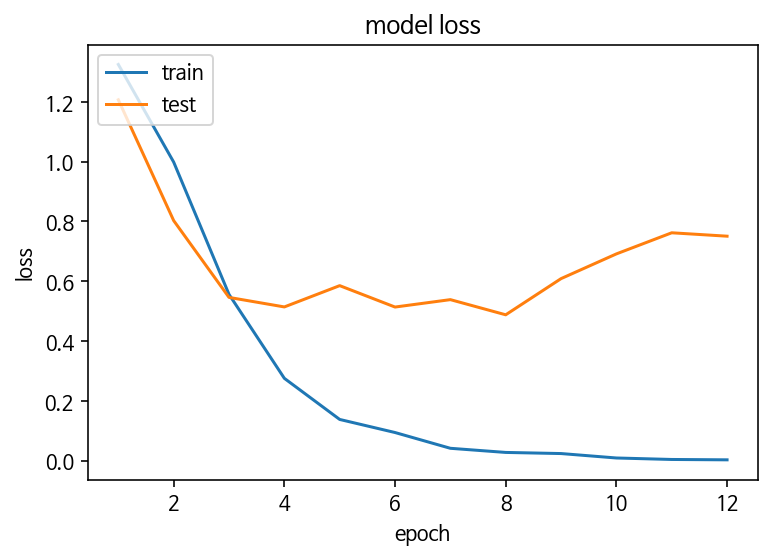

In [145]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [181]:
test_path =  os.getenv('HOME')+"/aiffel/prj/test.csv"
df_test = pd.read_csv(test_path)
df_test.head()

,text
0,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...
1,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...
2,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...
3,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...
4,그러니까 빨리 말해. 선생님 제발 살려주십시오. 비밀번호 틀릴 때마다 손톱 하나씩...


In [185]:
df_test['text'][0]

# X_test = []

tokenized_sentence = mec.morphs(df_test['text'][0]) # 토큰화
# [sep], [cls]
# print(tokenized_sentence)
stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
# print(stopwords_removed_sentence)
# tokenizer_mec.fit_on_texts(stopwords_removed_sentence)
x_test = tokenizer_mec.texts_to_sequences([stopwords_removed_sentence])
x_test = pad_sequences(x_test, maxlen = 305)
x_test

loaded_model.predict(x_test)

array([[0.77544546, 0.0362491 , 0.0731847 , 0.11512072]], dtype=float32)

In [186]:
pre_lst = ['협박 대화', '기타 괴롭힘 대화', '갈취 대화', '직장 내 괴롭힘 대화']
import re

def sentiment_predict(new_sentence):
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
    new_sentence = mec.morphs(new_sentence) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer_mec.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = 305) # 패딩
    cls = loaded_model.predict(pad_new).tolist()[0].index(max(loaded_model.predict(pad_new).tolist()[0]))
    return pre_lst[cls]
#     score = float(loaded_model.predict(pad_new)) # 예측


In [189]:
# max((loaded_model.predict(x_test))to_list)
# pre_lst = ['협박 대화', '기타 괴롭힘 대화', '갈취 대화', '직장 내 괴롭힘 대화']
# loaded_model.predict(x_test).tolist()[0].index(max(loaded_model.predict(x_test).tolist()[0]))
# sentiment_predict(df_test.text[0])
# df_test.text[1]
sentiment_predict(df_test.text[0])
df_test.head()
df_test['class'] = ''

for i in range(len(df_test)):
    df_test['class'][i] = sentiment_predict(df_test['text'][i])
    
df_test.head()

,text,class
0,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...,협박 대화
1,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...,직장 내 괴롭힘 대화
2,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...,직장 내 괴롭힘 대화
3,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...,직장 내 괴롭힘 대화
4,그러니까 빨리 말해. 선생님 제발 살려주십시오. 비밀번호 틀릴 때마다 손톱 하나씩...,협박 대화


In [190]:
df_test.to_csv('submission_lstm.csv',index=False, encoding = 'utf-8-sig')

In [193]:
df_test['text'][1]

'우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때?  네? 제가요? 그렇지? 2달만 파견 잘 갔다오면 승진이야. 네? 저는 별로 가고 싶지 않습니다. 여기 있는 모든사람도 가기 싫어해. 그러니까 막내인 영지씨가 가는게 맞지 정말 죄송합니다. 저는 못갑니다. 장난해? 모두를 위해 영지씨가 희생하는게 싫어? 네. 부당한 방법으로 가는 것 같습니다. 영지씨 안가면 회사생활 오래 못할 것 같은데 그래도 안갈거야? 안가면 지옥일텐데. 그래도 이 방법은 아닌 것 같습니다. 죄송합니다.'

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         1715968   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 4)                 516       
Total params: 1,848,068
Trainable params: 1,848,068
Non-trainable params: 0
_________________________________________________________________


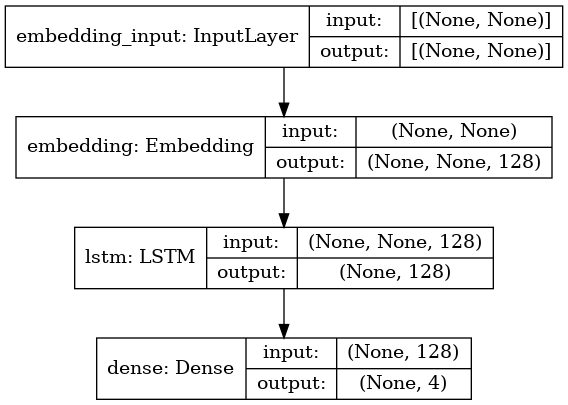

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Embedding, GlobalMaxPooling1D
from tensorflow.keras.layers import Input, Conv1D, Dropout, Concatenate, Add
from keras.models import Model

embedding_dim = 128
hidden_units = 128
num_classes = 4

lstm_model = Sequential()
lstm_model.add(Embedding(vocab_size, embedding_dim))
lstm_model.add(LSTM(hidden_units, dropout=0.1))
lstm_model.add(Dense(num_classes, activation='softmax'))

lstm_model.summary()
tf.keras.utils.plot_model(lstm_model, show_shapes=True)

In [39]:
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import f1_score 

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
lstm_history = lstm_model.fit(x_train, y_train, batch_size=128, epochs=30, callbacks=[es, mc], validation_data=(x_valid, y_valid))

Epoch 1/30
28/28 [==============================] - 37s 44ms/step - loss: 1.3151 - acc: 0.4315 - val_loss: 1.2770 - val_acc: 0.3367

Epoch 00001: val_acc improved from -inf to 0.33671, saving model to best_model.h5
Epoch 2/30
28/28 [==============================] - 1s 23ms/step - loss: 0.9124 - acc: 0.6636 - val_loss: 0.7681 - val_acc: 0.7418

Epoch 00002: val_acc improved from 0.33671 to 0.74177, saving model to best_model.h5
Epoch 3/30
28/28 [==============================] - 1s 23ms/step - loss: 0.4814 - acc: 0.8489 - val_loss: 0.5290 - val_acc: 0.8127

Epoch 00003: val_acc improved from 0.74177 to 0.81266, saving model to best_model.h5
Epoch 4/30
28/28 [==============================] - 1s 23ms/step - loss: 0.2360 - acc: 0.9319 - val_loss: 0.4826 - val_acc: 0.8405

Epoch 00004: val_acc improved from 0.81266 to 0.84051, saving model to best_model.h5
Epoch 5/30
28/28 [==============================] - 1s 23ms/step - loss: 0.1177 - acc: 0.9691 - val_loss: 0.5413 - val_acc: 0.8278

Ep

In [40]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(x_valid, y_valid)[1]))

13/13 [==============================] - 0s 10ms/step - loss: 0.4826 - acc: 0.8405

 테스트 정확도: 0.8405


In [41]:
test_path =  os.getenv('HOME')+"/aiffel/prj/test.csv"
df_test = pd.read_csv(test_path)
df_test.head()

,Unnamed: 0,text
0,t_000,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...
1,t_001,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...
2,t_002,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...
3,t_004,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...
4,t_005,그러니까 빨리 말해. 선생님 제발 살려주십시오. 비밀번호 틀릴 때마다 손톱 하나씩...


In [43]:
tokenized_sentence = mec.morphs(df_test['text'][1]) # 토큰화
# [sep], [cls]
# print(tokenized_sentence)
stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
# print(stopwords_removed_sentence)
# tokenizer_mec.fit_on_texts(stopwords_removed_sentence)
x_test = tokenizer_mec.texts_to_sequences([stopwords_removed_sentence])
x_test = pad_sequences(x_test, maxlen = 305)
x_test

loaded_model.predict(x_test)

array([[0.00304652, 0.00377547, 0.98508865, 0.00808935]], dtype=float32)

In [46]:
import re
def sentiment_predict(new_sentence):
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
    new_sentence = mec.morphs(new_sentence) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer_mec.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = 305) # 패딩
    cls = loaded_model.predict(pad_new).tolist()[0].index(max(loaded_model.predict(pad_new).tolist()[0]))
    return cls

df_test['class'] = ''

for i in range(len(df_test)):
    df_test['class'][i] = sentiment_predict(df_test['text'][i])
    
df_test.head()

,Unnamed: 0,text,class
0,t_000,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...,1
1,t_001,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...,2
2,t_002,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...,2
3,t_004,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...,3
4,t_005,그러니까 빨리 말해. 선생님 제발 살려주십시오. 비밀번호 틀릴 때마다 손톱 하나씩...,0


In [47]:
df_test.to_csv('submission_lstm_2.csv',index=False, encoding = 'utf-8-sig')

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import numpy as np

# 모델의 예측값을 얻습니다.
predictions = loaded_model.predict(x_valid)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_valid, axis=1)

# 혼동 행렬을 생성합니다.
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy를 계산합니다.
accuracy = accuracy_score(true_classes, predicted_classes)
print("\nAccuracy: {:.4f}".format(accuracy))

# Macro F1-score를 계산합니다.
macro_f1 = f1_score(true_classes, predicted_classes, average='macro')
print("Macro F1-score: {:.4f}".format(macro_f1))

# Weighted F1-score를 계산합니다.
weighted_f1 = f1_score(true_classes, predicted_classes, average='weighted')
print("Weighted F1-score: {:.4f}".format(weighted_f1))

Confusion Matrix:
[[74  8  1  6]
 [ 9 85  4  3]
 [ 3  0 90  6]
 [12  3  8 83]]

Accuracy: 0.8405
Macro F1-score: 0.8398
Weighted F1-score: 0.8407


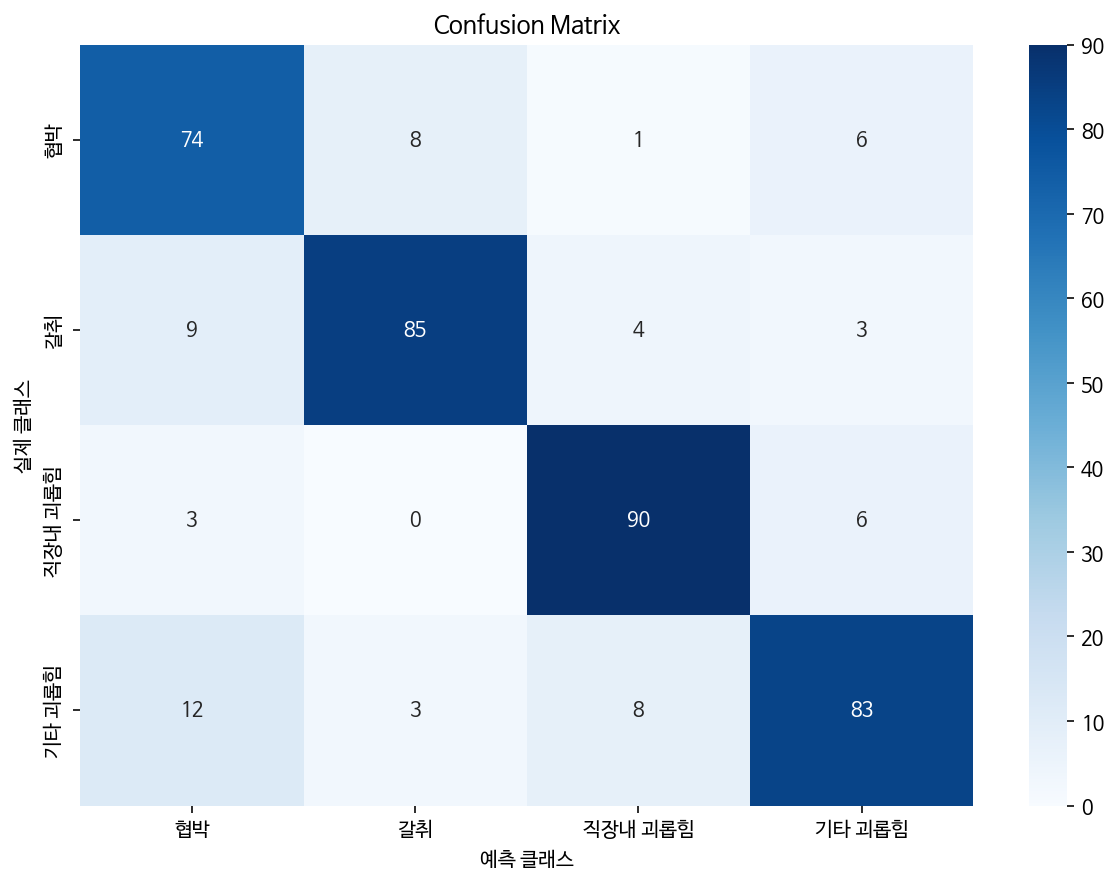

In [62]:
# 혼동 행렬 데이터 준비
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# 혼동 행렬 히트맵 그리기
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['협박', '갈취', '직장내 괴롭힘', '기타 괴롭힘'],
            yticklabels=['협박', '갈취', '직장내 괴롭힘', '기타 괴롭힘'])

plt.title('Confusion Matrix')
plt.ylabel('실제 클래스')
plt.xlabel('예측 클래스')
plt.show()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 128)         1715968   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               263168    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 1028      
Total params: 1,980,164
Trainable params: 1,980,164
Non-trainable params: 0
_________________________________________________________________


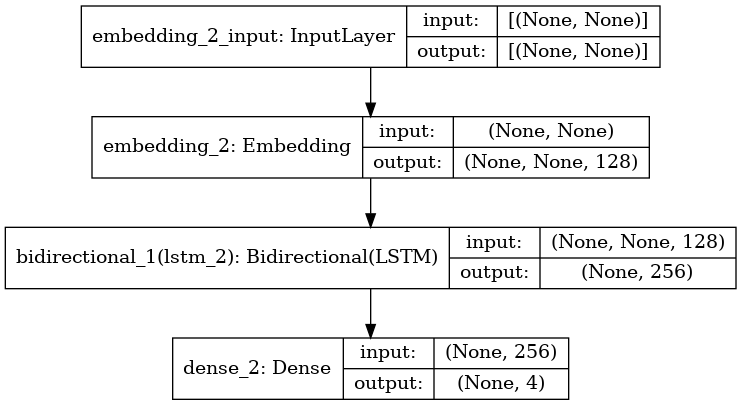

In [53]:
bilstm_model = Sequential()
bilstm_model.add(Embedding(vocab_size, embedding_dim))
bilstm_model.add(Bidirectional(LSTM(hidden_units, dropout=0.1))) # Bidirectional LSTM을 사용
bilstm_model.add(Dense(num_classes, activation='softmax'))

# tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units, dropout=dropout_rate)),

bilstm_model.summary()
tf.keras.utils.plot_model(bilstm_model, show_shapes=True)

In [54]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model_bilstm.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

bilstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
bilstm_history = bilstm_model.fit(x_train, y_train, batch_size=128, epochs=30, callbacks=[es, mc], validation_data=(x_valid, y_valid))

Epoch 1/30
28/28 [==============================] - 5s 71ms/step - loss: 1.3491 - acc: 0.4003 - val_loss: 1.2881 - val_acc: 0.5114

Epoch 00001: val_acc improved from -inf to 0.51139, saving model to best_model_bilstm.h5
Epoch 2/30
28/28 [==============================] - 1s 45ms/step - loss: 1.0674 - acc: 0.6051 - val_loss: 0.8590 - val_acc: 0.6506

Epoch 00002: val_acc improved from 0.51139 to 0.65063, saving model to best_model_bilstm.h5
Epoch 3/30
28/28 [==============================] - 1s 45ms/step - loss: 0.6570 - acc: 0.7519 - val_loss: 0.6617 - val_acc: 0.7468

Epoch 00003: val_acc improved from 0.65063 to 0.74684, saving model to best_model_bilstm.h5
Epoch 4/30
28/28 [==============================] - 1s 45ms/step - loss: 0.3716 - acc: 0.8841 - val_loss: 0.5631 - val_acc: 0.7924

Epoch 00004: val_acc improved from 0.74684 to 0.79241, saving model to best_model_bilstm.h5
Epoch 5/30
28/28 [==============================] - 1s 46ms/step - loss: 0.2271 - acc: 0.9361 - val_loss: 0

In [55]:
loaded_model_bilstm = load_model('best_model_bilstm.h5')
print("\n bi_lstm 테스트 정확도: %.4f" % (loaded_model_bilstm.evaluate(x_valid, y_valid)[1]))

13/13 [==============================] - 1s 17ms/step - loss: 0.5066 - acc: 0.8532

 bi_lstm 테스트 정확도: 0.8532


In [59]:
import re
def sentiment_predict_bilstm(new_sentence):
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
    new_sentence = mec.morphs(new_sentence) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer_mec.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = 305) # 패딩
    cls = loaded_model_bilstm.predict(pad_new).tolist()[0].index(max(loaded_model_bilstm.predict(pad_new).tolist()[0]))
    return cls

# df_test['class'] = ''

for i in range(len(df_test)):
    df_test['class'][i] = sentiment_predict_bilstm(df_test['text'][i])
    
df_test.head()

,Unnamed: 0,text,class
0,t_000,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...,1
1,t_001,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...,2
2,t_002,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...,2
3,t_004,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...,3
4,t_005,그러니까 빨리 말해. 선생님 제발 살려주십시오. 비밀번호 틀릴 때마다 손톱 하나씩...,0


In [60]:
df_test.to_csv('submission_bilstm_2.csv',index=False, encoding = 'utf-8-sig')

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import numpy as np

# 모델의 예측값을 얻습니다.
predictions = loaded_model_bilstm.predict(x_valid)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_valid, axis=1)

# 혼동 행렬을 생성합니다.
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy를 계산합니다.
accuracy = accuracy_score(true_classes, predicted_classes)
print("\nAccuracy: {:.4f}".format(accuracy))

# Macro F1-score를 계산합니다.
macro_f1 = f1_score(true_classes, predicted_classes, average='macro')
print("Macro F1-score: {:.4f}".format(macro_f1))

# Weighted F1-score를 계산합니다.
weighted_f1 = f1_score(true_classes, predicted_classes, average='weighted')
print("Weighted F1-score: {:.4f}".format(weighted_f1))

Confusion Matrix:
[[77  3  2  7]
 [14 82  2  3]
 [ 1  0 87 11]
 [ 7  2  6 91]]

Accuracy: 0.8532
Macro F1-score: 0.8535
Weighted F1-score: 0.8542


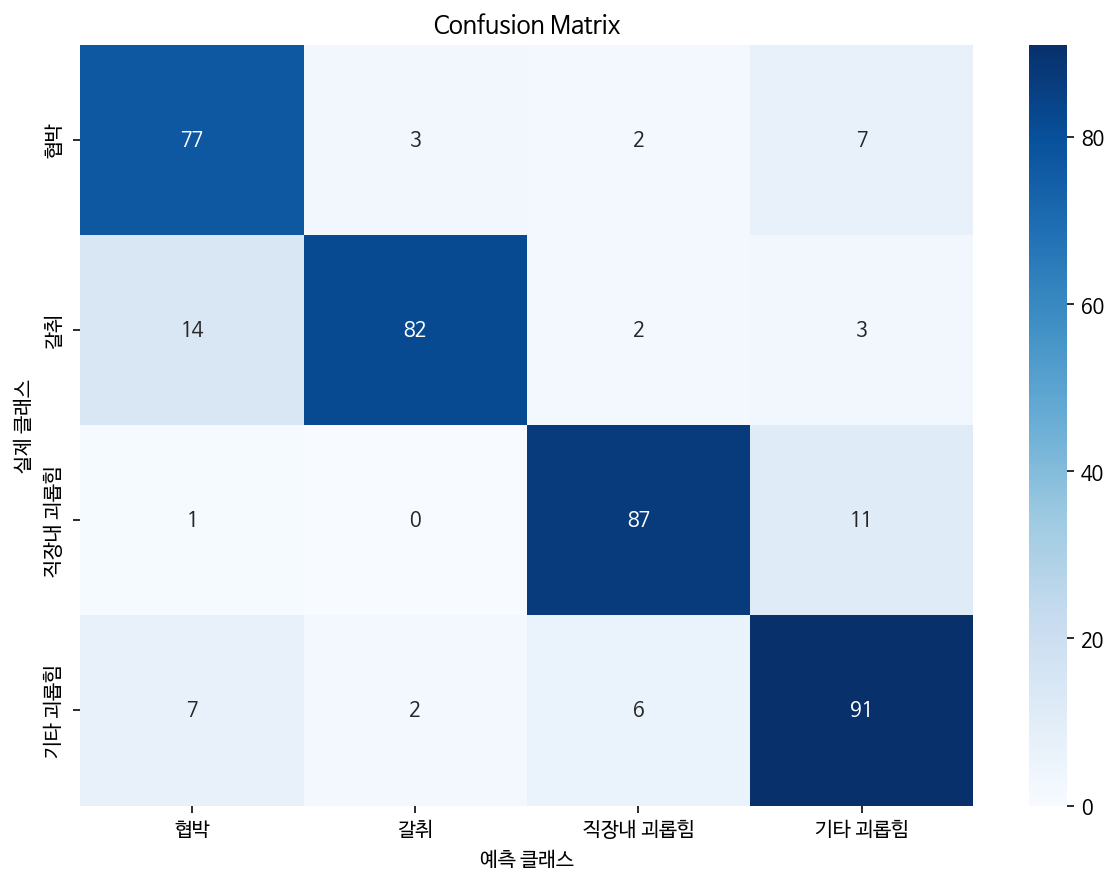

In [64]:
# 혼동 행렬 데이터 준비
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# 혼동 행렬 히트맵 그리기
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['협박', '갈취', '직장내 괴롭힘', '기타 괴롭힘'],
            yticklabels=['협박', '갈취', '직장내 괴롭힘', '기타 괴롭힘'])

plt.title('Confusion Matrix')
plt.ylabel('실제 클래스')
plt.xlabel('예측 클래스')
plt.show()

In [67]:
df.head()

df['bert_text'][0]

'[CLS] 지금 너 스스로를 죽여달라고 애원하는 것인가? [SEP] 아닙니다. 죄송합니다. [SEP] 죽을 거면 혼자 죽지 우리까지 사건에 휘말리게 해? 진짜 죽여버리고 싶게. [SEP] 정말 잘못했습니다. [SEP] 너가 선택해. 너가 죽을래 네 가족을 죽여줄까. [SEP] 죄송합니다. 정말 잘못했습니다. [SEP] 너에게는 선택권이 없어. 선택 못한다면 너와 네 가족까지 모조리 죽여버릴거야. [SEP] 선택 못하겠습니다. 한번만 도와주세요. [SEP] 그냥 다 죽여버려야겠군. 이의 없지? [SEP] 제발 도와주세요. [SEP]'